In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import yfinance as yf 

In [3]:
start='2010-01-01'
end='2024-01-03'

df=yf.download('AAPL',start,end)
df.head()


*********************100%***********************]  1 of 1 completed

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2010-01-04,6.447411,6.462173,6.398304,6.429937,493729600
2010-01-05,6.458560,6.495013,6.424516,6.465188,601904800
2010-01-06,6.355827,6.484167,6.349199,6.458559,552160000
2010-01-07,6.344077,6.386857,6.297983,6.379325,477131200
2010-01-08,6.386254,6.386857,6.298285,6.335642,447610800


In [4]:
df.tail()

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2023-12-26,192.108871,192.944773,191.889943,192.666139,28919300
2023-12-27,192.208359,192.556659,190.158404,191.551588,48087700
2023-12-28,192.636276,193.711013,192.228271,193.193544,34049900
2023-12-29,191.591385,193.452263,190.795282,192.954701,42628800
2024-01-02,184.734985,187.521338,182.993517,186.237618,82488700


In [5]:
df=df.reset_index()
df.head()

Price,Date,Close,High,Low,Open,Volume
Ticker,,AAPL,AAPL,AAPL,AAPL,AAPL
0,2010-01-04,6.447411,6.462173,6.398304,6.429937,493729600
1,2010-01-05,6.458560,6.495013,6.424516,6.465188,601904800
2,2010-01-06,6.355827,6.484167,6.349199,6.458559,552160000
3,2010-01-07,6.344077,6.386857,6.297983,6.379325,477131200
4,2010-01-08,6.386254,6.386857,6.298285,6.335642,447610800


In [7]:
df=df.drop(['Date'],axis='columns')
df.head()

C:\Users\agraw\AppData\Local\Temp\ipykernel_9724\1332264751.py:1: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  df=df.drop(['Date'],axis='columns')


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
0,6.447411,6.462173,6.398304,6.429937,493729600
1,6.458560,6.495013,6.424516,6.465188,601904800
2,6.355827,6.484167,6.349199,6.458559,552160000
3,6.344077,6.386857,6.297983,6.379325,477131200
4,6.386254,6.386857,6.298285,6.335642,447610800


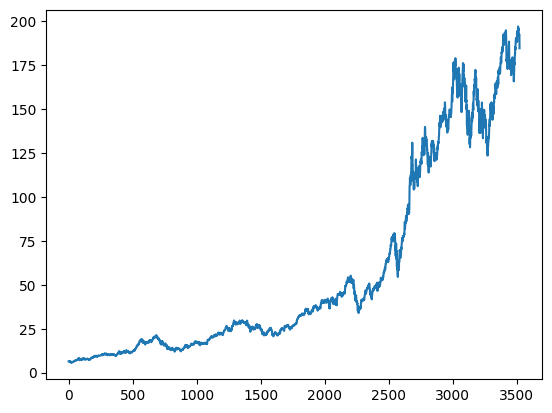

In [8]:
plt.plot(df.Close)

In [10]:
#Splltting Data into Trainig and Testing 

data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70):int(len(df))])

print(data_training.shape)
print(data_testing.shape)

(2466, 1)
(1057, 1)


In [11]:
data_training.head()

Ticker,AAPL
0,6.447411
1,6.458560
2,6.355827
3,6.344077
4,6.386254


In [12]:
data_testing.head()

Ticker,AAPL
2466,58.118065
2467,57.985172
2468,58.763260
2469,58.859921
2470,59.584862


In [19]:
from sklearn.preprocessing import MinMaxScaler
scaler= MinMaxScaler(feature_range=(0,1))

In [21]:
data_training_array.shape

(2466, 1)

In [20]:
data_training_array= scaler.fit_transform(data_training)
data_training_array

array([[0.01288585],
       [0.01310301],
       [0.01110204],
       ...,
       [0.99039845],
       [0.9946815 ],
       [1.        ]])

In [26]:
x_train=[]
y_train=[]

for i in range(100,data_training_array.shape[0]):
    x_train.append(data_training_array[i-100:i])
    y_train.append(data_training_array[i,0])

x_train = np.array(x_train)
y_train = np.array(y_train)

In [32]:
x_train.shape

(2366, 100, 1)

In [34]:
#Ml Model

from keras.layers import Dense,Dropout ,LSTM
from keras.models import Sequential 

In [41]:
model = Sequential()
model.add(LSTM(units = 50,activation ='relu',return_sequences =True,
              input_shape = (x_train.shape[1],1)))
model.add(Dropout(0.2))

          
model.add(LSTM(units = 60,activation ='relu',return_sequences =True))
model.add(Dropout(0.3))
          
         
model.add(LSTM(units = 80,activation ='relu',return_sequences =True))
model.add(Dropout(0.4))

          
model.add(LSTM(units = 50,activation ='relu'))
model.add(Dropout(0.5))


model.add(Dense(units=1))
          

In [42]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_3 (LSTM)                        │ (None, 100, 50)             │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 100, 50)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_4 (LSTM)                        │ (None, 100, 60)             │          26,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 100, 60)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_5 (LSTM)                        │ (None, 100, 80)             │          45,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 100, 80)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_6 (LSTM)                        │ (None, 50)                  │          26,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 108,411 (423.48 KB)

 Trainable params: 108,411 (423.48 KB)

 Non-trainable params: 0 (0.00 B)

In [44]:
model.compile(optimizer='adam',loss = 'mean_squared_error')
model.fit(x_train,y_train,epochs = 50)

Epoch 1/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 27s 217ms/step - loss: 0.0889
Epoch 2/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 16s 212ms/step - loss: 0.0110
Epoch 3/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 16s 220ms/step - loss: 0.0106
Epoch 4/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 16s 210ms/step - loss: 0.0089
Epoch 5/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 16s 211ms/step - loss: 0.0082
Epoch 6/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 15s 205ms/step - loss: 0.0084
Epoch 7/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 16s 218ms/step - loss: 0.0070
Epoch 8/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 15s 209ms/step - loss: 0.0065
Epoch 9/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 16s 217ms/step - loss: 0.0056
Epoch 10/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 16s 217ms/step - loss: 0.0059
Epoch 11/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 15s 207ms/step - loss: 0.0053
Epoch 12/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 15s 207ms/step - loss: 0.0048
Epoch 13/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 15s 203ms/step - loss: 0.0049
Epoch 14/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 16s 211ms/step - loss: 0.0051
Epoch 15/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 15s 

In [46]:
model.save('keras_model.keras')

In [47]:
data_testing.head()

Ticker,AAPL
2466,58.118065
2467,57.985172
2468,58.763260
2469,58.859921
2470,59.584862


In [48]:
past_100_days = data_training.tail(100)

In [51]:
final_df = pd.concat([past_100_days, data_testing], ignore_index=True)

In [52]:
final_df.head()

Ticker,AAPL
0,42.922237
1,42.144688
2,41.718601
3,43.244839
4,43.942951


In [54]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.00774413],
       [0.00274142],
       [0.        ],
       ...,
       [0.97099629],
       [0.96427351],
       [0.9201598 ]])

In [55]:
input_data.shape

(1157, 1)

In [57]:
x_test=[]
y_test=[]

for i in range(100,len(input_data)):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i,0])

In [59]:
x_test,y_test = np.array(x_test),np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(1057, 100, 1)
(1057,)


In [60]:
y_predicted = model.predict(x_test)

34/34 ━━━━━━━━━━━━━━━━━━━━ 4s 98ms/step


In [61]:
y_predicted.shape

(1057, 1)

In [62]:
scaler.scale_

array([0.00643395])

In [63]:
scale_factor = 1/0.00643395
y_predicted = y_predicted * scale_factor
y_test= y_test * scale_factor

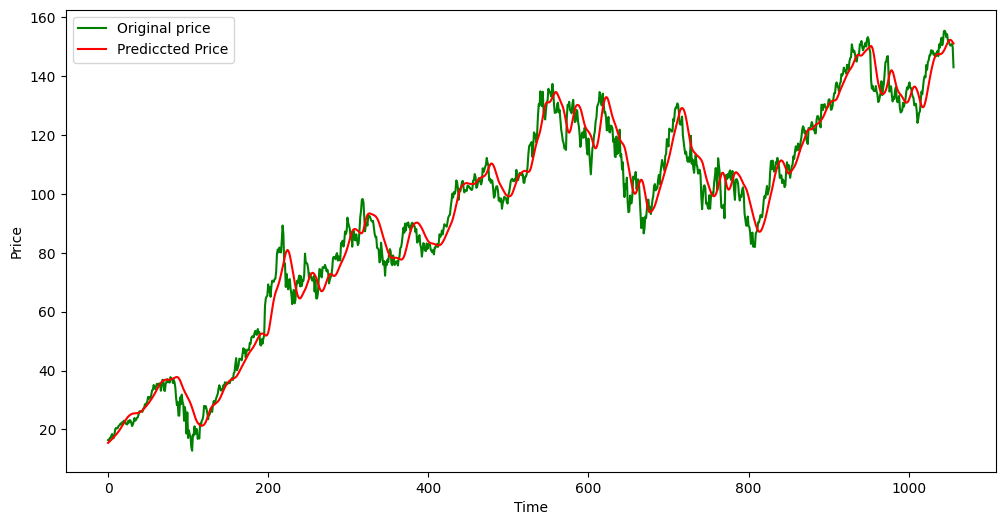

In [69]:
plt.figure(figsize=(12,6))
plt.plot(y_test,'g',label='Original price')
plt.plot(y_predicted,'r',label='Prediccted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()
